# Recep Tayyip Erdogan Eksisozluk Entry Analysis

This notebook is an analysis of the entries about Recep Tayyip Erdogan in the Turkish social media platform Eksisozluk. The dataset is obtained using the [scraper](https://github.com/iberkayC/eksisozluk_scraper) I wrote. The dataset contains more than 70,000 entries about Recep Tayyip Erdogan. The entries are in Turkish and analyzed in Turkish. The dataset contains the following columns:

- `Content`: The content of the entry.
- `Author`: The date of the entry.
- `Date Created`: The date of the entry.
- `Last Changed`: The date of the last change in the entry, null if there is no change.

## 1. Data Loading and Preprocessing

We start by importing necessary modules and setting up the environment.

In [1]:
import sys
from pathlib import Path
from typing import Optional

from IPython.display import display
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline

project_root = Path.cwd().parent
sys.path.append(str(project_root))

In [2]:
from src.utils.logging_config import get_logger, setup_logging

setup_logging(log_file="eda.log")
logger = get_logger(__name__)

In [3]:
from src.data.load_data import load_data
from src.data.preprocess import preprocess_data
from src.utils.helpers import get_turkish_stopwords
from src.analysis.analysis import (
    calculate_basic_stats,
    get_date_range,
    detect_anomalies,
    get_top_n_items,
    analyze_post_edits
)
from src.visualization.visualize import (
    analyze_date_range,
    create_author_activity_plot,
    create_content_length_distribution_plot,
    create_content_length_over_time_plot,
    create_posting_frequency_plot,
    create_posting_activity_heatmap,
    create_posting_patterns_plot,
    create_word_cloud,
    save_plot,
    save_plotly_figure,
)

In [4]:
def display_and_save_plots(
    mpl_fig: Optional[plt.Figure],
    plotly_fig: Optional[go.Figure],
    base_name: str,
) -> None:
    """
    Display and save both Matplotlib and Plotly figures.

    Args:
        mpl_fig (plt.Figure): Matplotlib figure
        plotly_fig (go.Figure): Plotly figure
        base_name (str): Base name for saving files
    """
    if mpl_fig is not None:
        display(mpl_fig)
        save_path = str(project_root / f"output/figures/{base_name}.png")
        save_plot(mpl_fig, save_path)

    if plotly_fig is not None:
        html_path = str(project_root / f"output/figures/{base_name}.html")
        save_plotly_figure(plotly_fig, html_path)

### Load Raw Data

We load the raw data from the JSON file using the `load_data` function.

In [5]:
logger.info("Loading raw data...")
raw_df = load_data(str(project_root / "data/raw/erdogan_thread.json"))

### Preprocess Data

We preprocess the data to clean and prepare it for analysis. This includes:
- Converting date columns to datetime objects.
- Removing links and normalizing text in the 'Content' column.
- Adding additional columns such as 'content_length', 'day_of_week', and 'hour'.

In [6]:
logger.info("Preprocessing data...")
df = preprocess_data(raw_df)


print(f"Loaded and preprocessed {len(df)} entries.")

df.head()

Loaded and preprocessed 73710 entries.


,Content,Author,Date Created,Last Changed,content_length,day_of_week,hour
0,okudugu siir ziya gokalp'e ait olan kisi,shalafi,2001-06-15 17:50:00,NaT,40,Friday,17
1,(bkz: recep bey'in yumurtaları),treachery,2001-08-24 10:36:00,2012-08-20 18:18:00,31,Friday,10
2,(bkz: rte 2000),ahmet corleone,2001-08-24 14:07:00,NaT,15,Friday,14
3,yapilacak ilk secimden (eger secime girmesine ...,exper,2001-08-24 21:54:00,2010-02-27 00:11:00,76,Friday,21
4,"kasımpaşa delikanlısı, eski istanbul belediye ...",undenied,2001-08-24 22:35:00,2003-05-25 16:32:00,275,Friday,22


The dataset now contains the following columns:
- `Content`: Cleaned content of the entry.
- `Author`: Author of the entry.
- `Date Created`: Timestamp of when the entry was created.
- `Last Changed`: Timestamp of the last modification, if any.
- `content_length`: Length of the content.
- `day_of_week`: Day of the week when the entry was created.
- `hour`: Hour of the day when the entry was created.

## 2. Basic Statistics

We calculate some basic statistics to understand the dataset better.

In [7]:
stats = calculate_basic_stats(df)
start_date, end_date = get_date_range(df)

print(f"Total number of posts: {stats['total_posts']}")
print(f"Date range: from {start_date} to {end_date}")
print(f"Number of unique authors: {stats['unique_authors']}")
print(f"Average content length: {stats['avg_content_length']:.2f}")
print(f"Median content length: {stats['median_content_length']:.2f}")
print(f"Average posts per day: {stats['avg_posts_per_day']:.2f}")

Total number of posts: 73710
Date range: from 2001-06-15 17:50:00 to 2024-08-22 14:48:00
Number of unique authors: 22034
Average content length: 330.13
Median content length: 153.00
Average posts per day: 8.70


In [8]:
post_edits = analyze_post_edits(df)

print(f"Total edited posts: {post_edits['edited_posts']}")
print(f"Edit ratio: {post_edits['edit_rate']:.2f}%")

Total edited posts: 2542
Edit ratio: 3.45%


## 3. Posting Frequency Analysis

We analyze how the posting frequency has changed over time.

### Plotting Posting Frequency

We create plots to visualize the number of posts over time.

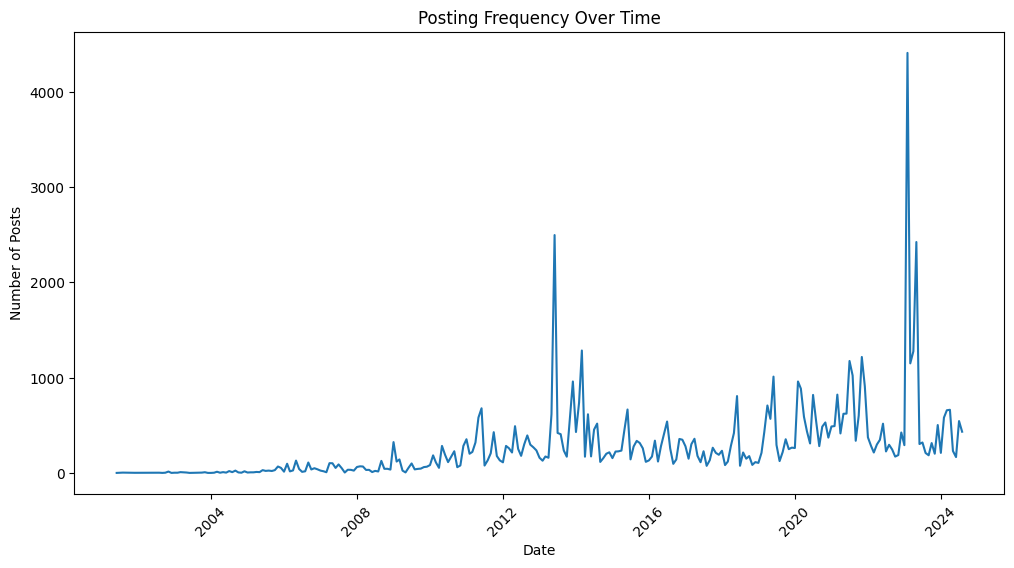

In [9]:
mpl_fig, plotly_fig = create_posting_frequency_plot(df)
display_and_save_plots(mpl_fig, plotly_fig, "posting_frequency")

### 3.1 Anomaly Detection in Posting Frequency

We detect anomalies in posting frequency using the DBSCAN clustering algorithm.## 3.1 Anomaly Detection in Posting Frequency

In [10]:
anomalies = detect_anomalies(df, save_path=str(project_root / "output/"))

Detected anomalies:
    Date Created  count
60    2007-07-01     90
78    2009-01-01    324
107   2011-06-01    679
110   2011-09-01    207
119   2012-06-01    253
122   2012-09-01    394
124   2012-11-01    269
131   2013-06-01   2496
133   2013-08-01    407
136   2013-11-01    574
139   2014-02-01    737
140   2014-03-01   1285
155   2015-06-01    666
191   2018-06-01    807
198   2019-01-01    106
201   2019-04-01    708
202   2019-05-01    568
203   2019-06-01   1011
208   2019-11-01    250
212   2020-03-01    885
213   2020-04-01    590
214   2020-05-01    436
215   2020-06-01    310
216   2020-07-01    819
220   2020-11-01    530
221   2020-12-01    371
224   2021-03-01    822
228   2021-07-01   1175
229   2021-08-01   1023
231   2021-10-01    601
232   2021-11-01   1217
233   2021-12-01    910
234   2022-01-01    374
242   2022-09-01    246
245   2022-12-01    425
247   2023-02-01   4407
248   2023-03-01   1150
249   2023-04-01   1277
250   2023-05-01   2423
257   2023-12-01    

## 3.2 Date Range Analysis

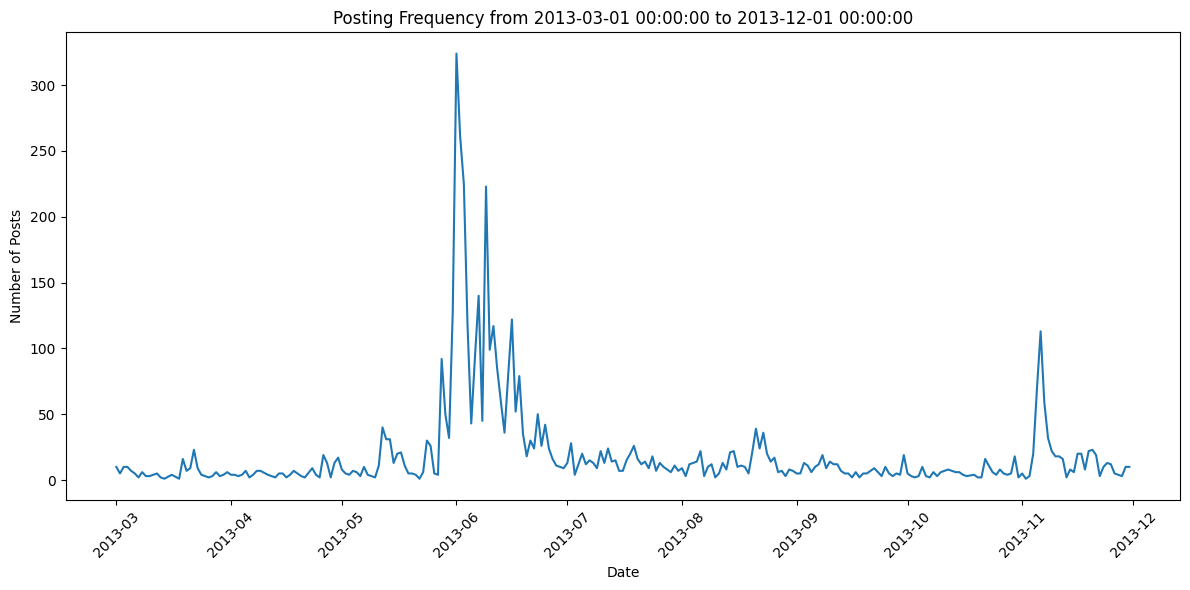

Total posts in this period: 5255
Average posts per day: 19.11


In [11]:
analyze_date_range(df, "2013-03-01", "2013-12-01")

## 4. Content Length Analysis

We examine the distribution and trends of content lengths in the entries.## 4. Content Length Analysis

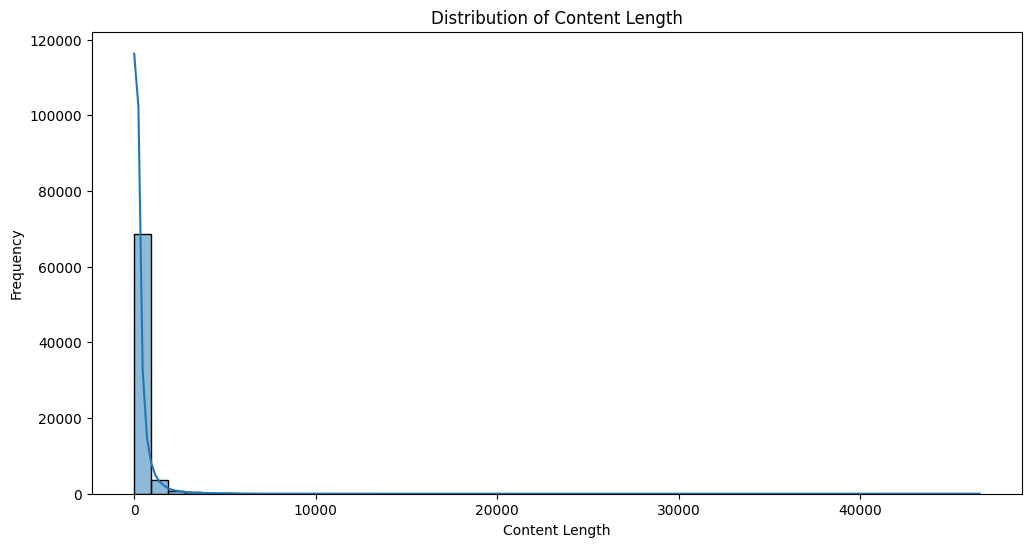

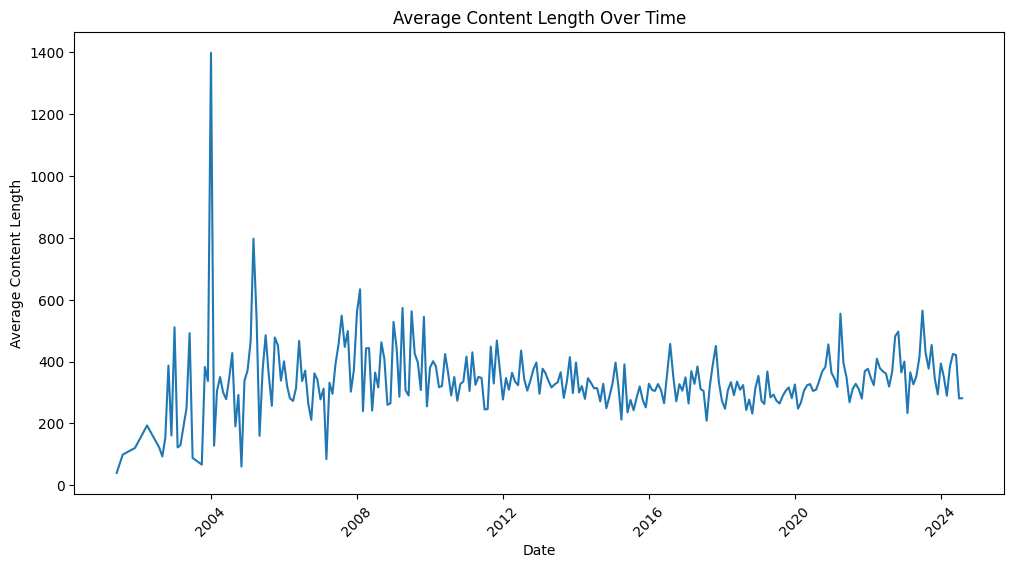

In [12]:
mpl_fig, plotly_fig = create_content_length_distribution_plot(df)
display_and_save_plots(mpl_fig, plotly_fig, "content_length_distribution")

mpl_fig, plotly_fig = create_content_length_over_time_plot(df)
display_and_save_plots(mpl_fig, plotly_fig, "content_length_over_time")

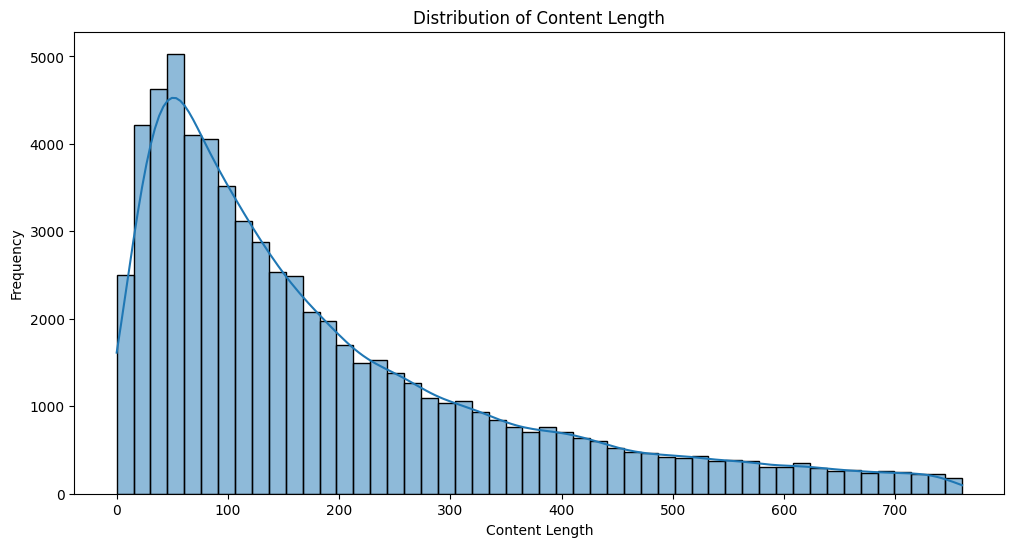

In [13]:
# using iqr to remove outliers
mpl_fig, plotly_fig = create_content_length_distribution_plot(df, iqr=True)
display_and_save_plots(mpl_fig, plotly_fig, "content_length_distribution")

## 5. Most Common Words

We generate a word cloud to visualize the most common words in the entries, excluding Turkish stopwords.


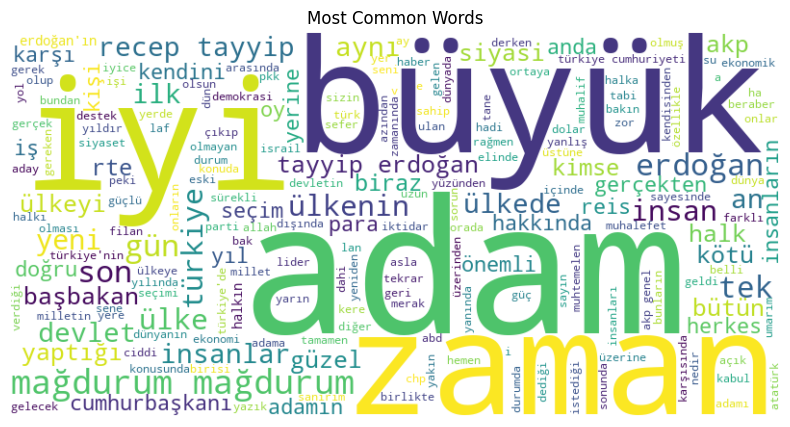

In [14]:
stop_words = get_turkish_stopwords()
all_text = " ".join(df["Content"])
mpl_fig = create_word_cloud(all_text, stop_words)
display_and_save_plots(mpl_fig, None, "word_cloud")

## 6. Author Activity Analysis

We identify the most active authors in the dataset.

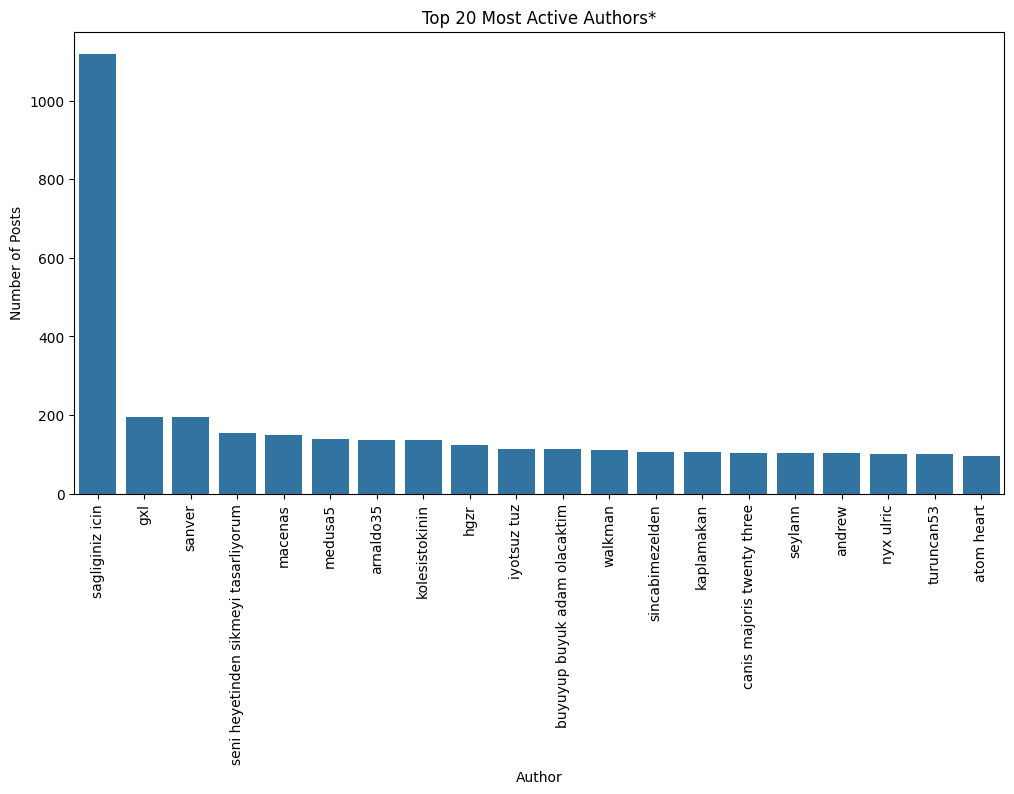

Top 10 most active authors:


Author
sagliginiz icin                         1119
gxl                                      196
sanver                                   194
seni heyetinden sikmeyi tasarliyorum     154
macenas                                  149
medusa5                                  139
arnaldo35                                137
kolesistokinin                           136
hgzr                                     123
iyotsuz tuz                              115
Name: count, dtype: int64

In [15]:
mpl_fig, plotly_fig = create_author_activity_plot(df, top_n=20)
display_and_save_plots(mpl_fig, plotly_fig, "author_activity")

top_authors = get_top_n_items(df, "Author", 10)
print("Top 10 most active authors:")
top_authors

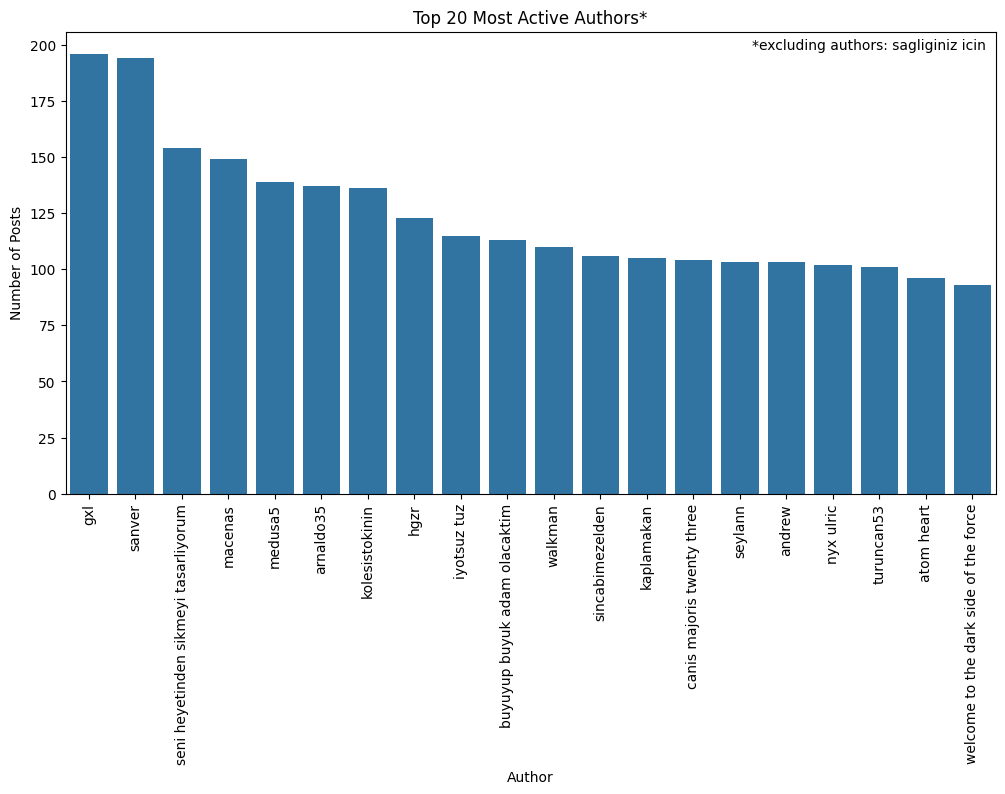

In [16]:
mpl_fig, plotly_fig = create_author_activity_plot(
    df, top_n=20, exclude_authors=["sagliginiz icin"]
)
display_and_save_plots(mpl_fig, plotly_fig, "author_activity_wo_spammer")

## 7.1 Posting Patterns

We explore posting patterns by day of the week and hour of the day.

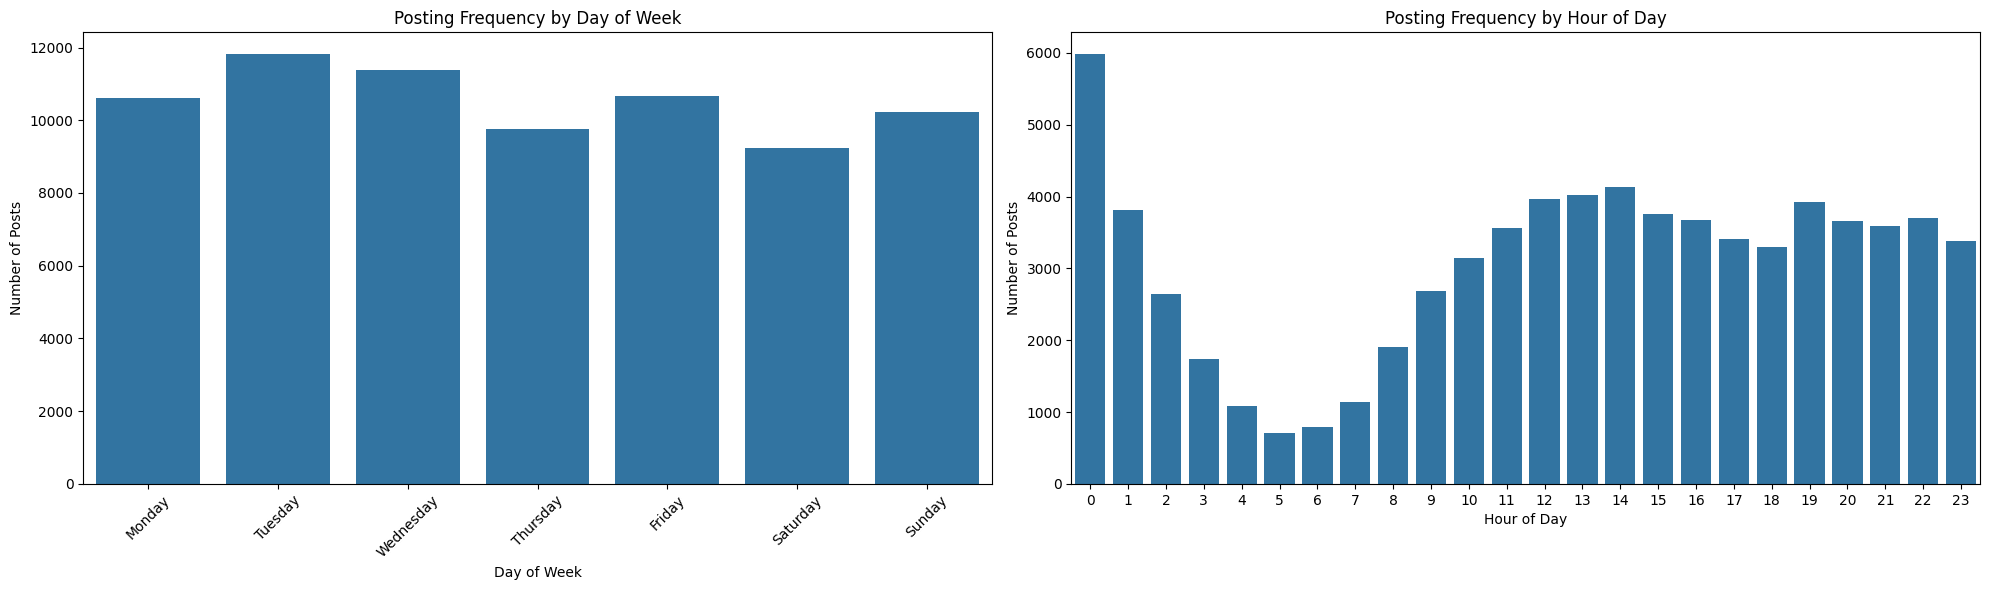

In [17]:
mpl_fig, plotly_fig = create_posting_patterns_plot(df)
display_and_save_plots(mpl_fig, plotly_fig, "posting_patterns")

### 7.2 Heatmap of Posting Activity

We create a heatmap to visualize the number of posts for each day of the week and hour of the day.

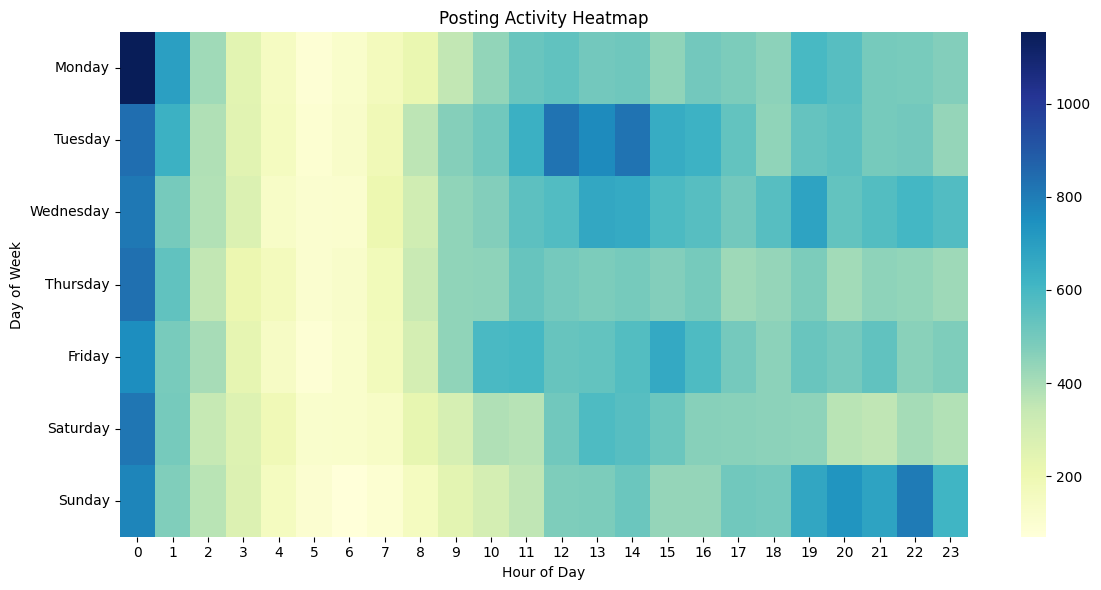

In [18]:
mpl_fig, plotly_fig = create_posting_activity_heatmap(df)
display_and_save_plots(mpl_fig, plotly_fig, "posting_activity_heatmap")

The heatmap shows peak posting times. Darker areas indicate higher activity.

## 8. Content Analysis

We analyze the content of the entries further, such as the most common first words.

In [19]:
df["first_word"] = df["Content"].str.split().str[0]
top_first_words = get_top_n_items(df, "first_word", 20)
print("Top 20 most common first words:")
top_first_words

Top 20 most common first words:


first_word
(bkz:         4500
bu            1862
bir           1320
kendisi        915
bugün          896
şu             790
son            759
her            705
türkiye        581
kendisine      530
çok            491
ne             437
an             424
kendisini      420
kendisinin     399
en             395
artık          375
kendi          330
az             329
hakkında       310
Name: count, dtype: int64

In [20]:
top_first_words = get_top_n_items(df, "first_word", 20, stopwords=stop_words)
print("Top 20 most common first words (excluding stopwords):")
top_first_words

Top 20 most common first words (excluding stopwords):


first_word
son            759
türkiye        581
an             424
hakkında       310
adam           277
türk           273
ülkenin        267
dün            260
---            217
seçim          213
ülkeyi         213
reis           191
türkiye'nin    187
20             181
siyasi         169
tek            166
bugünkü        166
allah          164
yeni           158
ilk            151
Name: count, dtype: int64

## Conclusion

This analysis provides insights into the entries about Recep Tayyip Erdogan on Eksisozluk. Further analysis could include sentiment analysis, topic modeling, or examining correlations between different variables.

---

**Note:** The code and analysis can be expanded or adjusted based on specific research questions or areas of interest.